In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [4]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    
    
    x_inp=Input(input_shape)
        
    X= Conv2D(16,(4,4),padding='same')(x_inp)
    X= BatchNormalization(axis=3)(X)
    X=Activation('relu')(X)
    
    
    X=MaxPooling2D(2,2)(X)
    
    
    X= Conv2D(32,(2,2),padding='valid')(X)
    X=Activation('relu')(X)
    
    X=Flatten()(X)
    X=Dense(1, activation='sigmoid')(X)\

    
    
    model= Model(inputs=x_inp, outputs=X)
    
    
    
    
    
    return model

In [5]:
happyModel = HappyModel(X_train.shape[1:])


In [6]:
happyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [7]:
happyModel.fit(X_train, Y_train, epochs=40, batch_size=64)

Epoch 1/40
600/600 [==============================] - 5s - loss: 1.3585 - acc: 0.5600     
Epoch 2/40
600/600 [==============================] - 5s - loss: 0.4584 - acc: 0.7933     
Epoch 3/40
600/600 [==============================] - 5s - loss: 0.2465 - acc: 0.9283     
Epoch 4/40
600/600 [==============================] - 5s - loss: 0.1733 - acc: 0.9417     
Epoch 5/40
600/600 [==============================] - 5s - loss: 0.1432 - acc: 0.9467     
Epoch 6/40
600/600 [==============================] - 5s - loss: 0.1051 - acc: 0.9633     
Epoch 7/40
600/600 [==============================] - 5s - loss: 0.0880 - acc: 0.9717     
Epoch 8/40
600/600 [==============================] - 5s - loss: 0.0701 - acc: 0.9783     
Epoch 9/40
600/600 [==============================] - 5s - loss: 0.0537 - acc: 0.9833     
Epoch 10/40
600/600 [==============================] - 5s - loss: 0.0458 - acc: 0.9867     
Epoch 11/40
600/600 [==============================] - 5s - loss: 0.0447 - acc: 0.9833   

In [8]:
preds = happyModel.evaluate(X_test, Y_test, batch_size=64)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 0s     

Loss = 0.0934212942918
Test Accuracy = 0.960000003974


In [35]:
def predimg(path):
    img_path= path
    img = image.load_img(img_path, target_size=(64, 64))
    imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    res= happyModel.predict(x)
    res=int(res[0][0])
    if res<1: 
        res1='unhappy'
    else:
        res1='happy'    


    return res,res1
    
    

0- unhappy


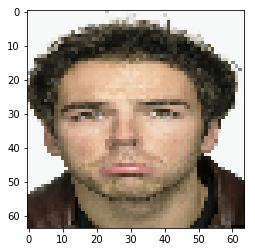

In [36]:


res,res1=predimg('images/vh6to.jpg')
print(str(res)+'- '+res1)

1- happy


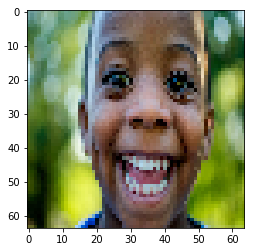

In [37]:
res,res1=predimg('images/bigsmile.jpg')
print(str(res)+'- '+res1)

In [12]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        784       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 32)        2080      
_________________________________________________________________
activation_2 (Activation)    (None, 31, 31, 32)        0         
__________

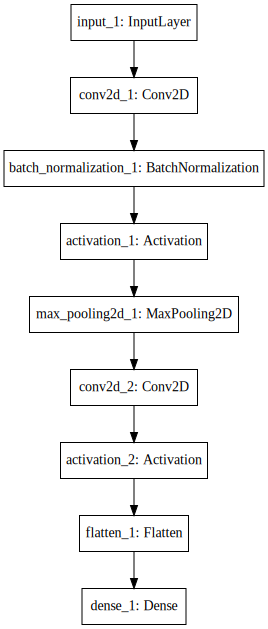

In [34]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))

## End.